In [20]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("seaborn")

In [40]:
with open('./urdf_comparison.json') as f:
    data = json.load(f)
df = pd.json_normalize(data["Isaac Sim Data"])

In [41]:
df.columns = ["time", "timestep", "tekken_cad_joint_position", "tekken_cad_desired_joint_position",  "tekken_old_joint_position", "tekken_old_desired_joint_position"]

In [42]:
df

,time,timestep,tekken_cad_joint_position,tekken_cad_desired_joint_position,tekken_old_joint_position,tekken_old_desired_joint_position
0,0.025000,3,"[[2.1423671725528948e-09, 2.2743384953116674e-...","[[0.0, 0.0, 0.0, 0.0, 0.0, 8.691581024322659e-...","[[3.058188369209347e-09, 3.1932205768470112e-0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 8.691581024322659e-..."
1,0.033333,4,"[[4.105820128330606e-09, 4.290722888100618e-09...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00026073789922520...","[[5.345213605068011e-09, 5.900232302735731e-09...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00026073789922520..."
2,0.041667,5,"[[6.554091047661359e-09, 5.93666360515499e-09,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00052144716028124...","[[7.0765300286268484e-09, 8.19088619152808e-09...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00052144716028124..."
3,0.050000,6,"[[9.753943430723666e-09, 7.3563191094194735e-0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00086901511531323...","[[8.564167153224389e-09, 1.0129767247235577e-0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00086901511531323..."
4,0.058333,7,"[[1.3360715200860795e-08, 8.57379056640184e-09...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00130340352188795...","[[9.675335199688107e-09, 1.1758561235808429e-0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00130340352188795..."
...,...,...,...,...,...,...
768,6.425000,771,"[[-1.8765455251923413e-06, 1.454706222148161e-...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9533125758171082,...","[[-1.4217738453226048e-07, 2.0949322276919702e...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9533125758171082,..."
769,6.433334,772,"[[-1.9347521629242692e-06, 1.4546997384456972e...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9614312052726746,...","[[-1.552946429228541e-07, 2.094927076257136e-0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9614312052726746,..."
770,6.441667,773,"[[-1.9944643554481445e-06, 1.454688725033293e-...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9695312976837158,...","[[-1.6913143952024257e-07, 2.0949194379227265e...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9695312976837158,..."
771,6.450000,774,"[[-2.055410959656001e-06, 1.4546786886171503e-...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9776120185852051,...","[[-1.8320019989914726e-07, 2.0949190826513586e...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.9776120185852051,..."


In [43]:
tekken_cad_positions = np.array(df["tekken_cad_joint_position"].values.tolist())
tekken_old_positions = np.array(df["tekken_old_joint_position"].values.tolist())
targets = np.array(df["tekken_cad_desired_joint_position"].values.tolist())
times = np.array(df["time"].values.tolist())

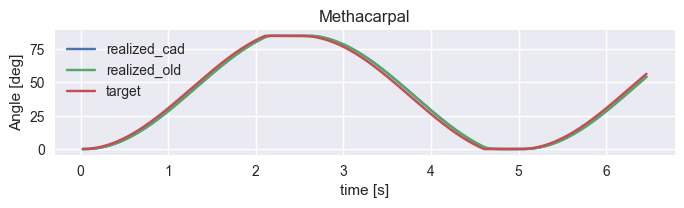

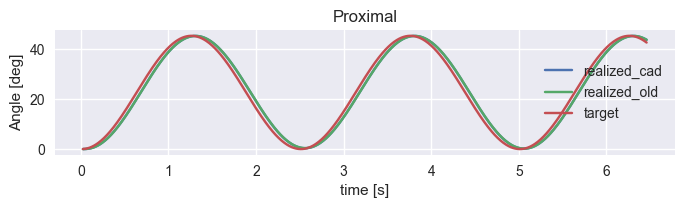

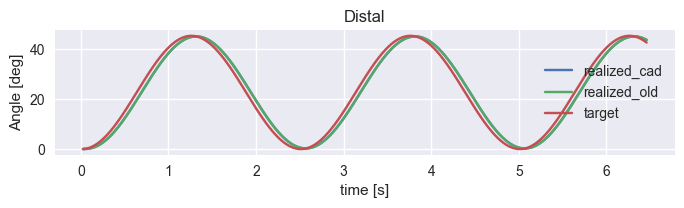

In [44]:
titles = ["Methacarpal", "Proximal", "Distal"]
fig = plt.figure()
for i in range(3):
    plt.subplot(3,1,i+1)
    joint_idx = i*5 + 5
    env_idx = 0
    plt.title(titles[i])
    plt.plot(times, np.degrees(tekken_cad_positions[:,env_idx,joint_idx]))
    plt.plot(times, np.degrees(tekken_old_positions[:,env_idx,joint_idx]))
    plt.plot(times, np.degrees(targets[:,env_idx,joint_idx]))
    plt.xlabel("time [s]")
    plt.ylabel("Angle [deg]")
    plt.legend(["realized_cad", "realized_old", "target"])
    plt.show()

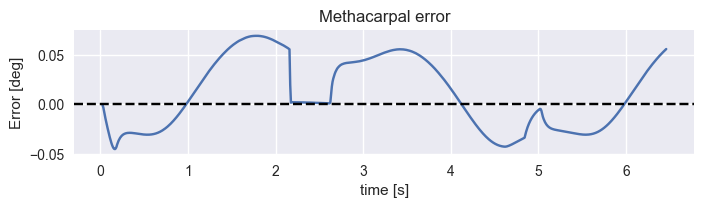

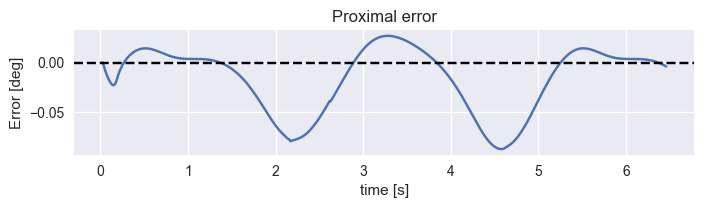

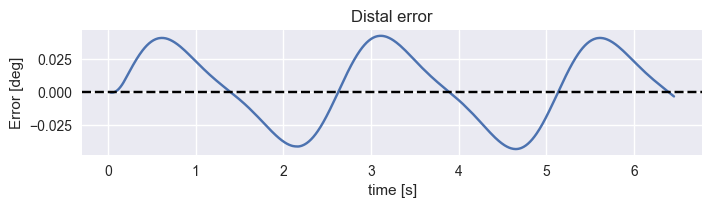

In [45]:
titles = ["Methacarpal error", "Proximal error", "Distal error"]
for i in range(3):
    plt.subplot(3,1,i+1)
    joint_idx = i*5 + 5
    env_idx = 0
    plt.title(titles[i])
    plt.plot(times, np.degrees(tekken_cad_positions[:,env_idx,joint_idx] - tekken_old_positions[:,env_idx,joint_idx]))
    plt.xlabel("time [s]")
    plt.ylabel("Error [deg]")
    plt.axhline(0, color = "black", linestyle='--')
    plt.show()